## **CUSTOMER SEGMENTATION**
Project by Syed Hur Abbas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tabulate import tabulate
from sklearn.cluster import DBSCAN, MeanShift, AffinityPropagation, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_excel('Electronic Shop Customer Segmentation.xlsx')
df

,CustomerID,Age,Gender,Location,ProductType,PurchaseCount,TotalSpend,AveragePurchaseValue,EngagementScore,FollowDuration,...,IsActive,MarketingSpend,ProductCost,SalesRevenue,CustomerAcquisitionDate,CustomerExitDate,CustomerRetentionPeriod,CPA,NumberOfTransactions,CompletionRate
0,1,56,Male,North America,Smart Watch,9,737,81.888889,2.079020,24,...,True,85.052053,368.5,737,22/07/2020,NaN,24.300000,85.052053,9,0.6
1,2,46,Female,Middle East,GPS Ring,3,334,111.333333,7.614333,18,...,True,87.253327,167.0,334,23/06/2021,NaN,24.200000,87.253327,3,0.6
2,3,32,Male,Asia,GPS Ring,1,515,515.000000,5.783094,10,...,True,56.871368,257.5,515,29/08/2021,NaN,16.466667,56.871368,1,0.6
3,4,60,Other,North America,Smart Watch,7,1037,148.142857,3.591508,7,...,True,86.957420,518.5,1037,27/05/2022,NaN,1.966667,86.957420,7,0.6
4,5,25,Male,Europe,GPS Ring,5,598,119.600000,5.435376,8,...,False,96.423852,299.0,598,24/04/2022,27/05/2023,1.900000,96.423852,5,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,Female,Middle East,GPS Ring,2,248,124.000000,8.794321,1,...,True,58.061541,124.0,248,16/07/2020,NaN,42.466667,58.061541,2,0.6
996,997,40,Other,Europe,Smartphone,6,1084,180.666667,1.089196,7,...,True,143.956859,542.0,1084,17/02/2021,NaN,33.733333,143.956859,6,0.6
997,998,27,Other,Middle East,GPS Ring,6,951,158.500000,8.002417,12,...,True,125.513362,475.5,951,2022-06-06 00:00:00,NaN,8.766667,125.513362,6,0.6
998,999,61,Female,Europe,Smartphone,1,1556,1556.000000,5.146602,10,...,True,108.662392,778.0,1556,23/01/2021,NaN,25.333333,108.662392,1,0.6


# **Data Cleaning**

**Calculates Various Business Metrics**

In [ ]:
# Calculate additional metrics
df['AveragePurchaseValue'] = df['TotalSpend'] / df['PurchaseCount']
df['CustomerProfitabilityScore'] = df['GrossProfit'] - df['CustomerCost']
df['ROAS'] = df['SalesRevenue'] / df['MarketingSpend']
df['ROI'] = (df['NetProfit'] - df['OperatingExpenses'] - df['AdditionalCosts']) / (df['OperatingExpenses'] + df['AdditionalCosts'])
df['GrossProfit'] = df['SalesRevenue'] - df['ProductCost']
df['GrossProfitMargin'] = (df['GrossProfit'] / df['SalesRevenue']) * 100
df['OperatingProfit'] = df['GrossProfit'] - df['OperatingExpenses']
df['OperatingProfitMargin'] = (df['OperatingProfit'] / df['SalesRevenue']) * 100
df['NetProfitMargin'] = (df['NetProfit'] / df['SalesRevenue']) * 100
df['CLTV'] = df['TotalSpend'] * df['CustomerRetentionPeriod']
df['CPA'] = df['MarketingSpend'] / df['NumberOfTransactions']
df['CompletionRate'] = (df['NumberOfTransactions'] / df['MarketingSpend']) * 100
df.head()

,CustomerID,Age,Gender,Location,ProductType,PurchaseCount,TotalSpend,AveragePurchaseValue,EngagementScore,FollowDuration,...,IsActive,MarketingSpend,ProductCost,SalesRevenue,CustomerAcquisitionDate,CustomerExitDate,CustomerRetentionPeriod,CPA,NumberOfTransactions,CompletionRate
0,1,56,Male,North America,Smart Watch,9,737,81.888889,2.079020,24,...,True,85.052053,368.5,737,22/07/2020,NaN,24.300000,9.450228,9,10.581755
1,2,46,Female,Middle East,GPS Ring,3,334,111.333333,7.614333,18,...,True,87.253327,167.0,334,23/06/2021,NaN,24.200000,29.084442,3,3.438264
2,3,32,Male,Asia,GPS Ring,1,515,515.000000,5.783094,10,...,True,56.871368,257.5,515,29/08/2021,NaN,16.466667,56.871368,1,1.758354
3,4,60,Other,North America,Smart Watch,7,1037,148.142857,3.591508,7,...,True,86.957420,518.5,1037,27/05/2022,NaN,1.966667,12.422489,7,8.049917
4,5,25,Male,Europe,GPS Ring,5,598,119.600000,5.435376,8,...,False,96.423852,299.0,598,24/04/2022,27/05/2023,1.900000,19.284770,5,5.185439


**Ensuring Consistency and Enabling Efficient Date-based Analysis.**

In [ ]:
# Parse date columns
df['SubscriptionStartDate'] = pd.to_datetime(df['SubscriptionStartDate'], dayfirst=True)
df['SubscriptionEndDate'] = df['SubscriptionStartDate'] + pd.to_timedelta(df['FollowDuration'], unit='D')
df['CustomerExitDate'] = df['SubscriptionEndDate']

# Ensure date columns are in correct format
date_cols = ['CustomerAcquisitionDate', 'CustomerExitDate', 'SubscriptionStartDate', 'SubscriptionEndDate', 'LastPurchaseDate']
df[date_cols] = df[date_cols].apply(lambda x: pd.to_datetime(x, errors='coerce', format='%d/%m/%Y'))
df


,CustomerID,Age,Gender,Location,ProductType,PurchaseCount,TotalSpend,AveragePurchaseValue,EngagementScore,FollowDuration,...,MarketingSpend,ProductCost,SalesRevenue,CustomerAcquisitionDate,CustomerExitDate,CustomerRetentionPeriod,CPA,NumberOfTransactions,CompletionRate,AgeGroup
0,1,56,Male,North America,Smart Watch,9,737,81.888889,2.079020,24,...,85.052053,368.5,737,2020-07-22,2022-07-15,24.300000,9.450228,9,10.581755,Old
1,2,46,Female,Middle East,GPS Ring,3,334,111.333333,7.614333,18,...,87.253327,167.0,334,2021-06-23,2022-05-14,24.200000,29.084442,3,3.438264,Old
2,3,32,Male,Asia,GPS Ring,1,515,515.000000,5.783094,10,...,56.871368,257.5,515,2021-08-29,2022-04-28,16.466667,56.871368,1,1.758354,Mid
3,4,60,Other,North America,Smart Watch,7,1037,148.142857,3.591508,7,...,86.957420,518.5,1037,2022-05-27,2022-09-06,1.966667,12.422489,7,8.049917,Old
4,5,25,Male,Europe,GPS Ring,5,598,119.600000,5.435376,8,...,96.423852,299.0,598,2022-04-24,2022-08-17,1.900000,19.284770,5,5.185439,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,Female,Middle East,GPS Ring,2,248,124.000000,8.794321,1,...,58.061541,124.0,248,2020-07-16,2022-05-24,42.466667,29.030770,2,3.444621,Young
996,997,40,Other,Europe,Smartphone,6,1084,180.666667,1.089196,7,...,143.956859,542.0,1084,2021-02-17,2022-04-13,33.733333,23.992810,6,4.167915,Mid
997,998,27,Other,Middle East,GPS Ring,6,951,158.500000,8.002417,12,...,125.513362,475.5,951,2022-06-06,2022-12-21,8.766667,20.918894,6,4.780368,Young
998,999,61,Female,Europe,Smartphone,1,1556,1556.000000,5.146602,10,...,108.662392,778.0,1556,2021-01-23,2022-08-08,25.333333,108.662392,1,0.920282,Old


In [ ]:
# Handle missing values and data cleaning
df = df.dropna()


**Detects and Handles Outliers**

In [ ]:
# Detect and handle outliers using IQR method and Isolation Forest
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
outliers_dict = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_dict[col] = outliers

from sklearn.ensemble import IsolationForest
outliers_dict_iso = {}
for col in numeric_cols:
    model = IsolationForest(contamination='auto', random_state=42)
    model.fit(df[[col]])
    outliers_mask = model.predict(df[[col]])
    outliers = df.loc[outliers_mask == -1]
    outliers_dict_iso[col] = outliers

for col1, outliers1 in outliers_dict.items():
    display(f"Column: {col1}")
    display(len(outliers1))


'Column: CustomerID'

0

'Column: Age'

0

'Column: PurchaseCount'

0

'Column: TotalSpend'

0

'Column: AveragePurchaseValue'

106

'Column: EngagementScore'

0

'Column: FollowDuration'

0

'Column: CustomerCost'

0

'Column: CustomerProfitabilityScore'

0

'Column: ROAS'

31

'Column: ROI'

0

'Column: RFMScore'

0

'Column: AverageRFM'

0

'Column: OperatingExpenses'

0

'Column: AdditionalCosts'

0

'Column: GrossProfit'

0

'Column: GrossProfitMargin'

0

'Column: OperatingProfit'

0

'Column: OperatingProfitMargin'

130

'Column: NetProfit'

0

'Column: NetProfitMargin'

0

'Column: CLTV'

11

'Column: MarketingSpend'

0

'Column: ProductCost'

0

'Column: SalesRevenue'

0

'Column: CustomerRetentionPeriod'

0

'Column: CPA'

107

'Column: NumberOfTransactions'

0

'Column: CompletionRate'

29

**Categorizing Customers into Three Age Groups**



In [ ]:
# Create age groups
conditions_age = [
    (df['Age'] >= 46),
    ((df['Age'] >= 30) & (df['Age'] <= 45)),
    (df['Age'] < 30)
]
labels = ['Old', 'Mid', 'Young']
df['AgeGroup'] = np.select(conditions_age, labels, default='Unknown')
df.head(10)

,CustomerID,Age,Gender,Location,ProductType,PurchaseCount,TotalSpend,AveragePurchaseValue,EngagementScore,FollowDuration,...,MarketingSpend,ProductCost,SalesRevenue,CustomerAcquisitionDate,CustomerExitDate,CustomerRetentionPeriod,CPA,NumberOfTransactions,CompletionRate,AgeGroup
0,1,56,Male,North America,Smart Watch,9,737,81.888889,2.079020,24,...,85.052053,368.5,737,2020-07-22,2022-07-15,24.300000,9.450228,9,10.581755,Old
1,2,46,Female,Middle East,GPS Ring,3,334,111.333333,7.614333,18,...,87.253327,167.0,334,2021-06-23,2022-05-14,24.200000,29.084442,3,3.438264,Old
2,3,32,Male,Asia,GPS Ring,1,515,515.000000,5.783094,10,...,56.871368,257.5,515,2021-08-29,2022-04-28,16.466667,56.871368,1,1.758354,Mid
3,4,60,Other,North America,Smart Watch,7,1037,148.142857,3.591508,7,...,86.957420,518.5,1037,2022-05-27,2022-09-06,1.966667,12.422489,7,8.049917,Old
4,5,25,Male,Europe,GPS Ring,5,598,119.600000,5.435376,8,...,96.423852,299.0,598,2022-04-24,2022-08-17,1.900000,19.284770,5,5.185439,Young
5,6,38,Male,Middle East,Smartphone,5,1073,214.600000,3.699479,6,...,122.273775,536.5,1073,2021-07-24,2022-05-23,32.000000,24.454755,5,4.089184,Mid
6,7,56,Male,North America,Smartphone,1,733,733.000000,6.364738,22,...,115.672949,366.5,733,2022-11-01,2022-10-11,3.633333,115.672949,1,0.864506,Old
7,8,36,Male,Asia,Smart Watch,9,1773,197.000000,4.904595,1,...,120.876565,886.5,1773,2020-12-30,2022-12-08,36.000000,13.430729,9,7.445612,Mid
8,9,40,Other,North America,Headphone,7,1119,159.857143,2.479650,4,...,50.836368,559.5,1119,2022-03-16,2022-07-17,4.866667,7.262338,7,13.769670,Mid
9,10,28,Other,Asia,Smartphone,8,214,26.750000,2.049248,14,...,71.766740,107.0,214,2020-05-06,2022-06-11,38.000000,8.970842,8,11.147225,Young


**Aggregated dataframes to analyze customer behavior, profitability, and marketing effectiveness, providing insights into customer segments, product preferences, geographic performance, and customer value.**

In [ ]:
# Aggregated data
df_NetProfit_by_AgeGroup = df.groupby('AgeGroup')['NetProfit'].sum().reset_index().sort_values(by='NetProfit', ascending=False)
df_GrossProfit_by_AgeGroup = df.groupby('AgeGroup')['GrossProfit'].sum().reset_index().sort_values(by='GrossProfit', ascending=False)
df_MarketingSpend_by_PreferredChannel = df.groupby('PreferredChannel')['MarketingSpend'].sum().reset_index().sort_values(by='MarketingSpend', ascending=False)
df_NetProfit_by_PreferredChannel = df.groupby('PreferredChannel')['NetProfit'].sum().reset_index().sort_values(by='NetProfit', ascending=False)
df_GrossProfit_by_PreferredChannel = df.groupby('PreferredChannel')['GrossProfit'].sum().reset_index().sort_values(by='GrossProfit', ascending=False)
df_Product_by_Age_Group = df.groupby(['AgeGroup', 'ProductType']).size().reset_index(name='PurchaseCount').sort_values(by=['AgeGroup', 'PurchaseCount'], ascending=[True, False]).groupby('AgeGroup').head(1)
df_NetProfit_by_Location = df.groupby('Location')['NetProfit'].sum().reset_index().sort_values(by='NetProfit', ascending=False)
df_GrossProfit_by_Location = df.groupby('Location')['GrossProfit'].sum().reset_index().sort_values(by='GrossProfit', ascending=False)
df_CLTV_by_AgeGroup = df.groupby('AgeGroup')['CLTV'].sum().reset_index().sort_values(by='CLTV', ascending=False)
df_CLTV_by_Location = df.groupby('Location')['CLTV'].sum().reset_index().sort_values(by='CLTV', ascending=False)
df_AverageRFM_by_AgeGroup = df.groupby('AgeGroup')['AverageRFM'].sum().reset_index().sort_values(by='AverageRFM', ascending=False)
df_AverageRFM_by_Location = df.groupby('Location')['AverageRFM'].sum().reset_index().sort_values(by='AverageRFM', ascending=False)

In [ ]:
# One-hot encoding
categorical_cols = ['AgeGroup', 'Gender', 'Location', 'ProductType', 'PreferredChannel', 'Persona']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [ ]:
# Define feature sets for clustering
features_1 = ['AgeGroup_Mid', 'AgeGroup_Old', 'AgeGroup_Young', 'GrossProfit', 'CustomerRetentionPeriod', 'NumberOfTransactions']
features_2 = ['Persona_Engaged', 'Persona_Married', 'Persona_Standard', 'NetProfit', 'CLTV', 'AverageRFM']
features_3 = ['Location_Asia', 'Location_Europe', 'Location_Middle East', 'Location_North America', 'GrossProfit', 'CLTV', 'AverageRFM']

X1 = df_encoded[features_1]
X2 = df_encoded[features_2]
X3 = df_encoded[features_3]

In [ ]:
X1

,AgeGroup_Mid,AgeGroup_Old,AgeGroup_Young,GrossProfit,CustomerRetentionPeriod,NumberOfTransactions
0,False,True,False,368.5,24.300000,9
1,False,True,False,167.0,24.200000,3
2,True,False,False,257.5,16.466667,1
3,False,True,False,518.5,1.966667,7
4,False,False,True,299.0,1.900000,5
...,...,...,...,...,...,...
995,False,False,True,124.0,42.466667,2
996,True,False,False,542.0,33.733333,6
997,False,False,True,475.5,8.766667,6
998,False,True,False,778.0,25.333333,1


In [ ]:
X2

,Persona_Engaged,Persona_Married,Persona_Standard,NetProfit,CLTV,AverageRFM
0,True,False,False,147.4,17909.100000,2.666667
1,False,False,True,66.8,8082.800000,1.666667
2,True,False,False,103.0,8480.333335,2.333333
3,True,False,False,207.4,2039.433334,3.666667
4,True,False,False,119.6,1136.200000,3.000000
...,...,...,...,...,...,...
995,True,False,False,49.6,10531.733334,2.333333
996,True,False,False,216.8,36566.933330,3.333333
997,True,False,False,190.2,8337.100000,3.000000
998,True,False,False,311.2,39418.666661,3.000000


In [ ]:
X3

,Location_Asia,Location_Europe,Location_Middle East,Location_North America,GrossProfit,CLTV,AverageRFM
0,False,False,False,True,368.5,17909.100000,2.666667
1,False,False,True,False,167.0,8082.800000,1.666667
2,True,False,False,False,257.5,8480.333335,2.333333
3,False,False,False,True,518.5,2039.433334,3.666667
4,False,True,False,False,299.0,1136.200000,3.000000
...,...,...,...,...,...,...,...
995,False,False,True,False,124.0,10531.733334,2.333333
996,False,True,False,False,542.0,36566.933330,3.333333
997,False,False,True,False,475.5,8337.100000,3.000000
998,False,True,False,False,778.0,39418.666661,3.000000


## **Scales the data using StandardScaler**

**Visualizes the distribution of features before and after scaling using histograms, ensuring that the data is normalized and ready for clustering analysis.**

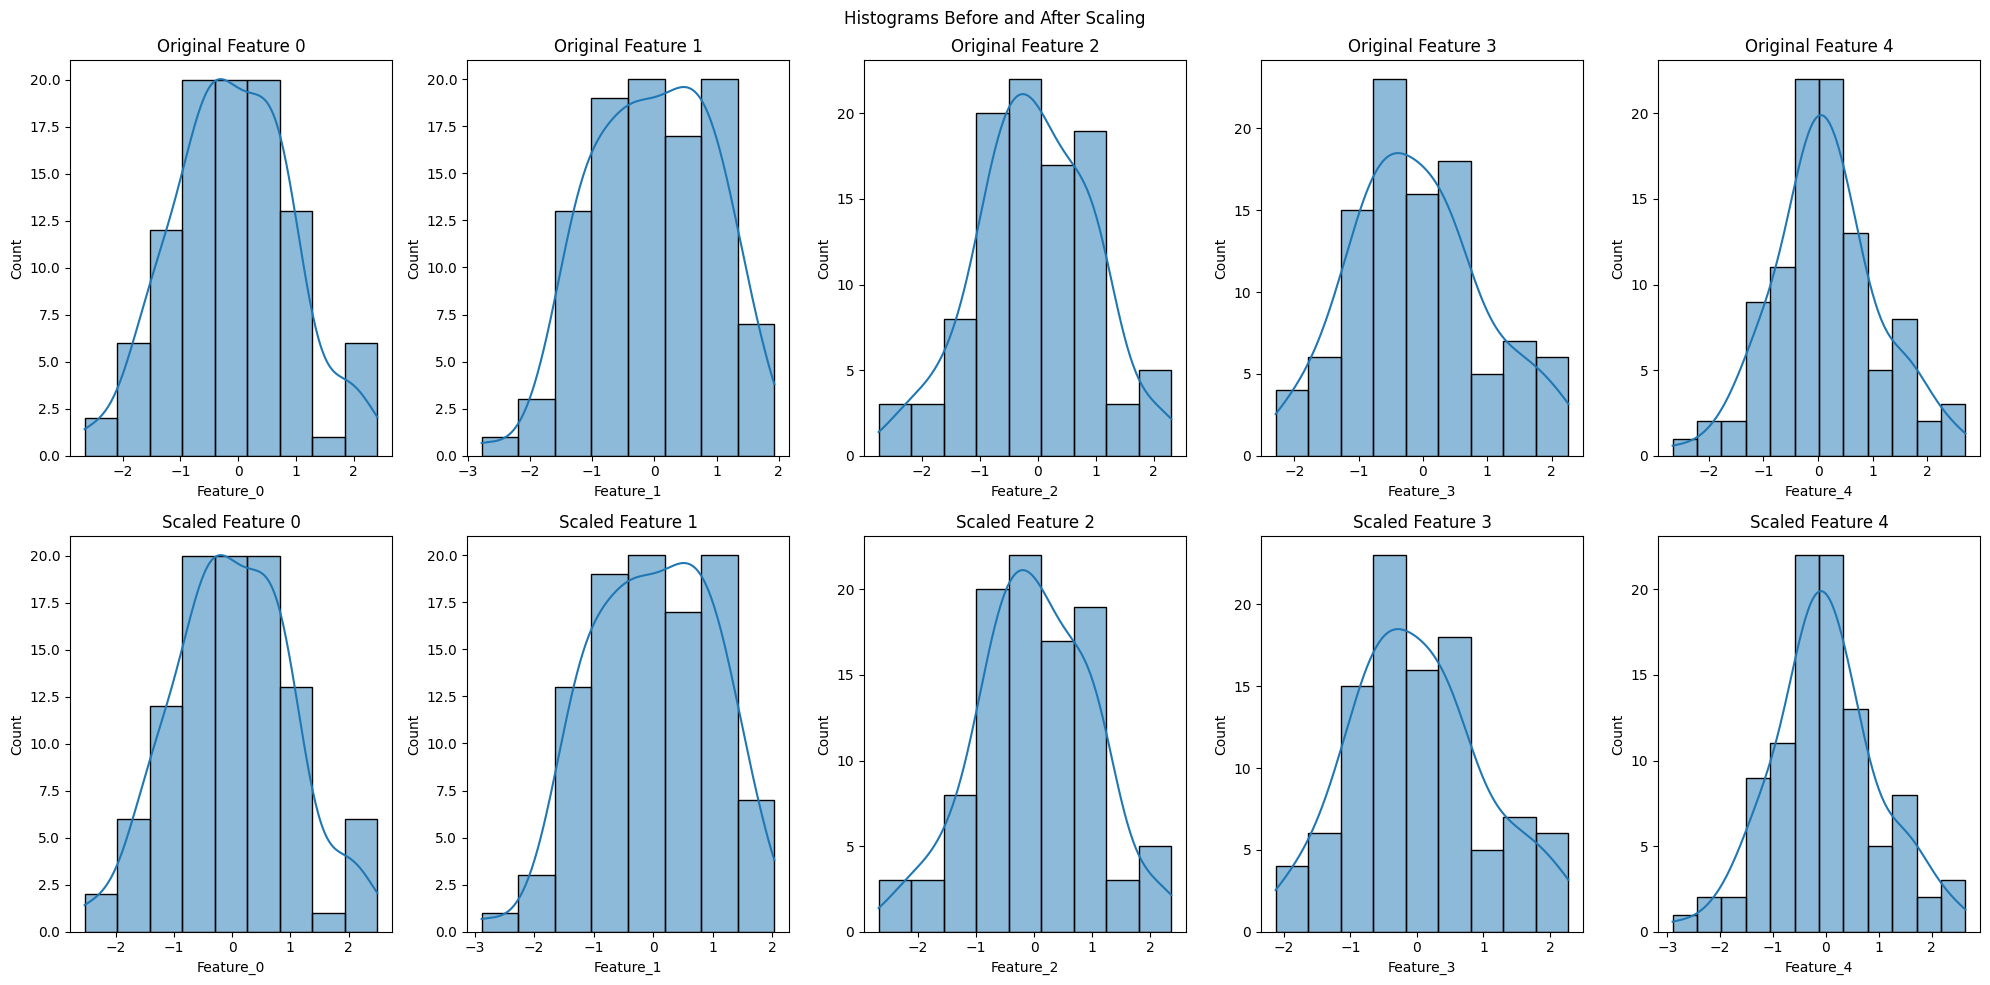

In [ ]:
# Scale the data
scaler = StandardScaler()
X_scaled_1 = scaler.fit_transform(X1)
X_scaled_2 = scaler.fit_transform(X2)
X_scaled_3 = scaler.fit_transform(X3)

X1_df = pd.DataFrame(X1, columns=[f'Feature_{i}' for i in range(X1.shape[1])])
X_scaled_1_df = pd.DataFrame(X_scaled_1, columns=[f'Feature_{i}' for i in range(X1.shape[1])])

# Histograms
fig, axes = plt.subplots(nrows=2, ncols=X1.shape[1], figsize=(20, 10))
fig.suptitle('Histograms Before and After Scaling')

for i in range(X1.shape[1]):
    sns.histplot(X1_df[f'Feature_{i}'], ax=axes[0, i], kde=True)
    axes[0, i].set_title(f'Original Feature {i}')
    sns.histplot(X_scaled_1_df[f'Feature_{i}'], ax=axes[1, i], kde=True)
    axes[1, i].set_title(f'Scaled Feature {i}')

plt.tight_layout()
plt.show()

### **Performs clustering analysis using four different algorithms (DBSCAN, MeanShift, AffinityPropagation, KMeans)**

**Calculates the silhouette score for each clustering result, enabling evaluation of cluster quality and comparison of clustering algorithms.**



In [ ]:
# Clustering with DBSCAN
dbscan = DBSCAN(eps=2, min_samples=2)
cluster_labels_db_1 = dbscan.fit_predict(X_scaled_1)
cluster_labels_db_2 = dbscan.fit_predict(X_scaled_2)
cluster_labels_db_3 = dbscan.fit_predict(X_scaled_3)

silhouette_avg_db_1 = silhouette_score(X_scaled_1, cluster_labels_db_1)
silhouette_avg_db_2 = silhouette_score(X_scaled_2, cluster_labels_db_2)
silhouette_avg_db_3 = silhouette_score(X_scaled_3, cluster_labels_db_3)

# Clustering with MeanShift
meanshift = MeanShift(bandwidth=0.5)
cluster_labels_me_1 = meanshift.fit_predict(X_scaled_1)
cluster_labels_me_2 = meanshift.fit_predict(X_scaled_2)
cluster_labels_me_3 = meanshift.fit_predict(X_scaled_3)
silhouette_avg_me_1 = silhouette_score(X_scaled_1, cluster_labels_me_1)
silhouette_avg_me_2 = silhouette_score(X_scaled_2, cluster_labels_me_2)
silhouette_avg_me_3 = silhouette_score(X_scaled_3, cluster_labels_me_3)

# Clustering with AffinityPropagation
affinity_propagation = AffinityPropagation(damping=0.7, preference=None)
cluster_labels_af_1 = affinity_propagation.fit_predict(X_scaled_1)
cluster_labels_af_2 = affinity_propagation.fit_predict(X_scaled_2)
cluster_labels_af_3 = affinity_propagation.fit_predict(X_scaled_3)
silhouette_avg_af_1 = silhouette_score(X_scaled_1, cluster_labels_af_1)
silhouette_avg_af_2 = silhouette_score(X_scaled_2, cluster_labels_af_2)
silhouette_avg_af_3 = silhouette_score(X_scaled_3, cluster_labels_af_3)

# Clustering with KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels_km_1 = kmeans.fit_predict(X_scaled_1)
cluster_labels_km_2 = kmeans.fit_predict(X_scaled_2)
cluster_labels_km_3 = kmeans.fit_predict(X_scaled_3)
silhouette_avg_km_1 = silhouette_score(X_scaled_1, cluster_labels_km_1)
silhouette_avg_km_2 = silhouette_score(X_scaled_2, cluster_labels_km_2)
silhouette_avg_km_3 = silhouette_score(X_scaled_3, cluster_labels_km_3)

### **Visualize Aggregated Data**

In [ ]:
# Visualization
def plot_aggregated_data(df, x_col, y_col, title):
    fig = px.bar(
        df,
        x=x_col,
        y=y_col,
        title=title,
        color=y_col,  # Color bars by the y_col value
        labels={x_col: x_col.replace('_', ' ').title(), y_col: y_col.replace('_', ' ').title()},  # Better labels
        color_continuous_scale=px.colors.sequential.Viridis  # Change color scale
    )

    fig.update_layout(
        title={'text': title, 'x': 0.5},  # Center title
        xaxis_title=x_col.replace('_', ' ').title(),
        yaxis_title=y_col.replace('_', ' ').title(),
        template='plotly_dark',  # Change the template to dark mode
        font=dict(size=14),  # Increase font size
        plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
        paper_bgcolor='rgba(0,0,0,0)',  # Transparent paper
        margin=dict(l=40, r=40, t=40, b=40)  # Adjust margins
    )

    fig.show()

plot_aggregated_data(df_NetProfit_by_AgeGroup, 'AgeGroup', 'NetProfit', 'Net Profit by Age Group')
plot_aggregated_data(df_GrossProfit_by_AgeGroup, 'AgeGroup', 'GrossProfit', 'Gross Profit by Age Group')
plot_aggregated_data(df_MarketingSpend_by_PreferredChannel, 'PreferredChannel', 'MarketingSpend', 'Marketing Spend by Preferred Channel')
plot_aggregated_data(df_NetProfit_by_PreferredChannel, 'PreferredChannel', 'NetProfit', 'Net Profit by Preferred Channel')
plot_aggregated_data(df_GrossProfit_by_PreferredChannel, 'PreferredChannel', 'GrossProfit', 'Gross Profit by Preferred Channel')
plot_aggregated_data(df_NetProfit_by_Location, 'Location', 'NetProfit', 'Net Profit by Location')
plot_aggregated_data(df_GrossProfit_by_Location, 'Location', 'GrossProfit', 'Gross Profit by Location')
plot_aggregated_data(df_CLTV_by_AgeGroup, 'AgeGroup', 'CLTV', 'CLTV by Age Group')
plot_aggregated_data(df_CLTV_by_Location, 'Location', 'CLTV', 'CLTV by Location')
plot_aggregated_data(df_AverageRFM_by_AgeGroup, 'AgeGroup', 'AverageRFM', 'Average RFM by Age Group')
plot_aggregated_data(df_AverageRFM_by_Location, 'Location', 'AverageRFM', 'Average RFM by Location')

**Store and organize the Silhouette scores from various clustering algorithms (DBSCAN, KMeans, AffinityPropagation, MeanShift) applied to different feature sets (Features 1, 2, 3), allowing for easy comparison and evaluation of clustering performance.**

In [ ]:
silhouette_scores = {
    'Algorithm': ['DBSCAN', 'DBSCAN', 'DBSCAN', 'KMeans', 'KMeans', 'KMeans',
                  'AffinityPropagation', 'AffinityPropagation', 'AffinityPropagation',
                  'MeanShift', 'MeanShift', 'MeanShift'
                  ],
    'Features': ['Features 1', 'Features 2', 'Features 3', 'Features 1', 'Features 2', 'Features 3',
                 'Features 1', 'Features 2', 'Features 3', 'Features 1', 'Features 2', 'Features 3'],
    'Silhouette Score': [silhouette_avg_db_1, silhouette_avg_db_2, silhouette_avg_db_3,
                         silhouette_avg_km_1, silhouette_avg_km_2, silhouette_avg_km_3,
                         silhouette_avg_af_1, silhouette_avg_af_2, silhouette_avg_af_3,
                         silhouette_avg_me_1, silhouette_avg_me_2, silhouette_avg_me_3
                         ]
}

# Create DataFrame
df = pd.DataFrame(silhouette_scores)
df

,Algorithm,Features,Silhouette Score
0,DBSCAN,Features 1,0.403835
1,DBSCAN,Features 2,0.606817
2,DBSCAN,Features 3,0.454103
3,KMeans,Features 1,0.332471
4,KMeans,Features 2,0.476063
5,KMeans,Features 3,0.454103
6,AffinityPropagation,Features 1,0.271477
7,AffinityPropagation,Features 2,0.293031
8,AffinityPropagation,Features 3,0.284930
9,MeanShift,Features 1,0.263800


### Marketing Strategies Based on DBSCAN Clustering

#### **Cluster 0:**
- **Top Features:**
  - Gross Profit: 541.64
  - Customer Retention Period: 21.37
  - Number of Transactions: 4.88
  - Age Group: Old
- **Strategy:**
  - **Target older customers with personalized discounts.**
  - Focus on high-grossing products.
  - Enhance customer retention with engagement initiatives.
  - Encourage frequent purchases with flash sales and limited-time offers.

#### **Cluster 1:**
- **Top Features:**
  - Gross Profit: 537.66
  - Customer Retention Period: 21.58
  - Number of Transactions: 5.05
  - Age Group: Mid
- **Strategy:**
  - **Target middle-aged customers with loyalty programs.**
  - Focus on high-grossing products.
  - Enhance customer retention with engagement initiatives.
  - Encourage frequent purchases with flash sales and limited-time offers.

#### **Cluster 2:**
- **Top Features:**
  - Gross Profit: 492.55
  - Customer Retention Period: 21.91
  - Number of Transactions: 4.93
  - Age Group: Young
- **Strategy:**
  - **Target young customers with social media campaigns.**
  - Focus on high-grossing products.
  - Enhance customer retention with engagement initiatives.
  - Encourage frequent purchases with flash sales and limited-time offers.

### Marketing Strategies Based on KMeans Clustering

#### **Cluster 0:**
- **Top Features:**
  - Gross Profit: 541.64
  - Customer Retention Period: 21.37
  - Number of Transactions: 4.88
  - Age Group: Old
- **Strategy:**
  - **Target older customers with personalized discounts.**
  - Focus on high-grossing products.
  - Enhance customer retention with engagement initiatives.
  - Encourage frequent purchases with flash sales and limited-time offers.

#### **Cluster 1:**
- **Top Features:**
  - Gross Profit: 553.85
  - Customer Retention Period: 19.20
  - Number of Transactions: 2.95
  - Age Group: Mid
- **Strategy:**
  - **Target middle-aged customers with loyalty programs.**
  - Focus on high-grossing products.
  - Enhance customer retention with engagement initiatives.
  - Encourage frequent purchases with flash sales and limited-time offers.

#### **Cluster 2:**
- **Top Features:**
  - Gross Profit: 492.55
  - Customer Retention Period: 21.91
  - Number of Transactions: 4.93
  - Age Group: Young
- **Strategy:**
  - **Target young customers with social media campaigns.**
  - Focus on high-grossing products.
  - Enhance customer retention with engagement initiatives.
  - Encourage frequent purchases with flash sales and limited-time offers.

#### **Cluster 3:**
- **Top Features:**
  - Gross Profit: 520.40
  - Customer Retention Period: 24.12
  - Number of Transactions: 7.29
  - Age Group: Mid
- **Strategy:**
  - **Target middle-aged customers with loyalty programs.**
  - Focus on high-grossing products.
  - Enhance customer retention with engagement initiatives.
  - Encourage frequent purchases with flash sales and limited-time offers.

### Marketing Strategies Based on Affinity Propagation Clustering

#### **Cluster 0:**
- **Top Features:**
  - Gross Profit: 801.35
  - Customer Retention Period: 22.09
  - Number of Transactions: 1.75
  - Age Group: Mid
- **Strategy:**
  - **Target middle-aged customers with loyalty programs.**
  - Focus on high-grossing products.
  - Enhance customer retention with engagement initiatives.
  - Encourage frequent purchases with flash sales and limited-time offers.

#### **Cluster 1:**
- **Top Features:**
  - Gross Profit: 176.44
  - Customer Retention Period: 31.96
  - Number of Transactions: 7.20
  - Age Group: Young
- **Strategy:**
  - **Target young customers with social media campaigns.**
  - Focus on high-grossing products.
  - Enhance customer retention with engagement initiatives.
  - Encourage frequent purchases with flash sales and limited-time offers.

#### **Cluster 2:**
- **Top Features:**
  - Gross Profit: 230.11
  - Customer Retention Period: 31.05
  - Number of Transactions: 2.82
  - Age Group: Young
- **Strategy:**
  - **Target young customers with social media campaigns.**
  - Focus on high-grossing products.
  - Enhance customer retention with engagement initiatives.
  - Encourage frequent purchases with flash sales and limited-time offers.

#### **Cluster 3:**
- **Top Features:**
  - Gross Profit: 362.52
  - Customer Retention Period: 34.29
  - Number of Transactions: 1.83
  - Age Group: Old
- **Strategy:**
  - **Target older customers with personalized discounts.**
  - Focus on high-grossing products.
  - Enhance customer retention with engagement initiatives.
  - Encourage frequent purchases with flash sales and limited-time offers.

#### **Cluster 4:**
- **Top Features:**
  - Gross Profit: 705.90
  - Customer Retention Period: 15.26
  - Number of Transactions: 7.83
  - Age Group: Young
- **Strategy:**
  - **Target young customers with social media campaigns.**
  - Focus on high-grossing products.
  - Enhance customer retention with engagement initiatives.
  - Encourage frequent purchases with flash sales and limited-time offers.

### Summary of Key Marketing Strategies

- **Targeting Based on Age Groups:**
  - **Young Customers:** Social media campaigns, high engagement online content.
  - **Middle-aged Customers:** Loyalty programs, tailored offers.
  - **Older Customers:** Personalized discounts, high-value product promotions.

- **Common Strategies:**
  - **Focus on High-Grossing Products:** Across all clusters, high-grossing products are key.
  - **Enhance Customer Retention:** Use engagement initiatives, loyalty programs, and personalized offers.
  - **Encourage Frequent Purchases:** Utilize flash sales, limited-time offers, and frequent engagement.

By focusing on the specific needs and behaviors of each cluster, the marketing strategies can be tailored to maximize impact and improve overall business performance.